# model deployment for country_wise_latest.csv

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib

df = pd.read_csv('country_wise_latest.csv')
df1 = df.select_dtypes(include=['number'])

X = df1.drop('Deaths / 100 Recovered' , axis=1)
y = df1['Deaths']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state=42)

model = RandomForestClassifier()
model.fit(X_scaled , y)

joblib.dump(model , "covid.pkl")
joblib.dump(scalar , "covid_scalar.pkl")

['covid_scalar.pkl']

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

df = pd.read_csv('country_wise_latest.csv')
df1 = df.select_dtypes(include=['number'])

X = df1.drop('Deaths / 100 Recovered' , axis=1)
y = df1['Deaths']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

scalar = StandardScaler()
X_train_saled = scalar.fit_transform(X_train)

model = RandomForestClassifier()
model.fit(X_train_saled , y_train)

RandomForestClassifier()

In [3]:
import pickle as pkl

with open("covid.pkl" , "wb") as f:
    pkl.dump(model , f)

with open("covid_scalar.pkl" , "wb") as f:
    pkl.dump(scalar , f)

import joblib

joblib.dump(model , "covid_model_joblib.pkl")
joblib.dump(scalar , "covid_scalar_joblib.pkl")

['covid_scalar_joblib.pkl']

In [4]:
import pickle as pkl

with open("covid.pkl" , "rb") as f:
    loaded_data = pkl.load(f)

import joblib

loaded_data = joblib.load("covid_model_joblib.pkl")

X_test_scaled = scalar.transform(X_test)
prediction = loaded_data.predict(X_test)

c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('country_wise_latest.csv')

df1 = df.select_dtypes(include=['number'])

X = df1.drop('Deaths / 100 Recovered' , axis=1)
y = df1['Deaths']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

scalar = StandardScaler()
X_train_saled = scalar.fit_transform(X_train)

model = RandomForestClassifier(n_estimators=5 , random_state=42)
model.fit(X_train_saled , y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [6]:
from sklearn.metrics import confusion_matrix , classification_report , roc_auc_score

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[: , 1]

print("Confusion matrix : " , confusion_matrix(y_test , y_pred))
print("Classification report : " , classification_report(y_test , y_pred))
print("ROC AUC : " , roc_auc_score(y_test , y_pred_prob))

c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\annsl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` par

Confusion matrix :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
Classification report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00       6.0
           3       0.00      0.00      0.00       2.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          60       0.00      0.00      0.00       1.0
          96       0.00      0.00      0.00       1.0
         108       0.00      0.00      0.00       1.0
         116       0.00      0.00      0.00       1.0
         140       0.00      0.00      0.00       1.0
         165       0.00      0.00      0.00       0.0
         168       0.00 

ValueError: multi_class must be in ('ovo', 'ovr')

In [7]:
import joblib 

joblib.dump(model , "covid_model_joblib.pkl")
joblib.dump(scalar , "covid_scalar_joblib.pkl")

['covid_scalar_joblib.pkl']

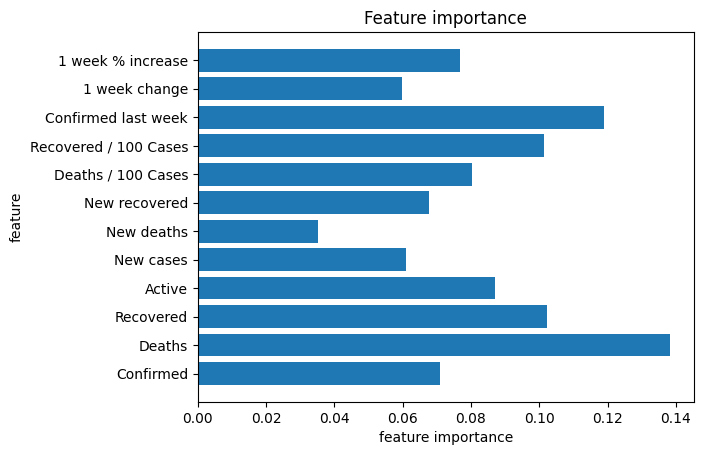

<Figure size 1000x600 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('country_wise_latest.csv')

df1 = df.select_dtypes(include=['number'])

feature = df1.drop('Deaths / 100 Recovered' , axis=1).columns
importances = model.feature_importances_
plt.barh(feature , importances)
plt.title("Feature importance")
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.figure(figsize=(10,6))

plt.show()